# MLM statistics + visualization #

This notebook is used for multilevel linear analysis for fractional occupancy and dwell time for each state. 


**Last update:** 12.08.2022

### Step 0: Installing libraries ###

In [5]:
#Installing libraries
#install.packages("nlme")
install.packages("reshape");
install.packages("readr");
install.packages("magrittr");
install.packages("dplyr");
install.packages("tidyverse");
install.packages("sjmisc");
install.packages("RColorBrewer");

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘sjstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [57]:
install.packages("lme4",repos=c("http://lme4.r-forge.r-project.org/repos",getOption("repos")[["CRAN"]]))
install.packages("lmerTest")
install.packages("sjPlot")
install.packages("pbkrtest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Step 0.1: Loading libraries ###

In [49]:
#Loading libraries
library(readr)
library(magrittr)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)
library(sjPlot)
library(sjmisc)
library(ggplot2)
library(RColorBrewer)
library(pbkrtest)

### Step 1: Loading data ###

In [50]:
#Loading csv data
data <- read_csv("data/df_merge.csv", show_col_types = FALSE)

#Changing the names of columns
colnames(data)[5] <- "FO"
colnames(data)[6] <- "DT"

#Loading data as categorical
data$Subject <- as.factor(data$Subject)
data$Session <- as.factor(data$Session)
data$Run <- as.factor(data$Run)
data$State <- as.factor(data$State)

In [3]:
#Printing data
head(data)

Subject,Session,Run,State,FO,DT
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,PLCB,1,1,18.89401,7.454545
0,PLCB,1,2,33.64055,7.684211
0,PLCB,1,3,20.27650,6.285714
0,PLCB,1,4,27.18894,7.375000
1,PLCB,1,1,22.58065,7.000000
1,PLCB,1,2,28.11060,5.809524


--------------------------

### **Resting-state vs. music listening** ###

In [51]:
#Selecting data from run 1 & 2
data_run12 <- filter(data, Run != 3)

### Step 2: Performing analysis for fractional occupancy ###

In [5]:
#Iterating over states

for (i in 1:4) {
    
    data_fo_state <- filter(data_run12, State == i)
    
    print(paste("MLM for state:", i))
    m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=data_fo_state) #performing MLM analysis
    stats_fo <- anova(m_fo)
    print(stats_fo)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.13282 0.13282     1 20.756  0.0119 0.9143
Session     1.67496 1.67496     1 30.454  0.1497 0.7015
Run:Session 0.57730 0.57730     1 35.971  0.0516 0.8216
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          0.2363  0.2363     1 14.557  0.0176 0.8964
Session     10.6535 10.6535     1 21.727  0.7923 0.3832
Run:Session  6.4768  6.4768     1 24.948  0.4817 0.4941
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          0.9185  0.9185     1 15.536  0.1351 0.7181
Session     11.6931 11.6931     1 21.141  1.7204 0.2037
Run:Session 10.7263 10.7263     1 24.352  1.5782 0.2209
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.5308  1.5308     1 10.796  0.1479 0.7080
Session     2.3208  2.3208     1 24.959  0.2243 0.6399
Run:Session 2.3260  2.3260     1 24.972  0.2248 0.6395


### Step 3: Performing analysis for dwell time ###

In [54]:
#Iterating over states

for (i in 1:4) {
    
    data_dt_state <- filter(data_run12, State == i)
    print(paste("MLM for state:", i))
    m_dt <- lmer(DT ~ Run*Session + (1 + Run + Session|Subject), data=data_dt_state) #performing MLM analysis
    stats_dt <- anova(m_dt)
    print(stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.066917 0.066917     1 13.276  0.0672 0.7994
Session     0.000517 0.000517     1 15.064  0.0005 0.9821
Run:Session 0.003083 0.003083     1 25.250  0.0031 0.9561
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.2957  0.2957     1 13.395  0.2994 0.59323  
Session     4.9326  4.9326     1 25.167  4.9953 0.03453 *
Run:Session 0.0234  0.0234     1 25.005  0.0237 0.87877  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.13185 1.13185     1 12.953  1.1993 0.2934
Session     0.95372 0.95372     1 17.499  1.0106 0.3285
Run:Session 0.00639 0.00639     1 24.762  0.0068 0.9351
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.00035 0.00035     1 15.196  0.0007 0.97976  
Session     0.92947 0.92947     1 14.614  1.7479 0.20646  
Run:Session 2.63973 2.63973     1 25.182  4.9642 0.03504 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [53]:
em_dt = emmeans(m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       6.30 0.212 13.0     5.84     6.76
 PLCB      6.91 0.223 13.2     6.43     7.39

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB   -0.611 0.277 13.2  -2.203  0.0459

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

### Custom contrasts ###

In [18]:
#Post-hoc for state 4
em_dt = emmeans(m_dt, specs = pairwise ~ Session:Run)

lsd_1 = c(1, 0, 0, 0)
plcb_1 = c(0, 1, 0, 0)
lsd_2 = c(0, 0, 1, 0)
plcb_2 = c(0, 0, 0, 1)

contrast(em_dt, method = list("LSD run 1 - placebo run 1" = lsd_1 - plcb_1, "LSD run 1 - LSD run 2" = lsd_1 - lsd_2, "placebo run 1 - placebo run 2" = plcb_1 - plcb_2, 
                              "LSD run 2 - placebo run 2" = lsd_2 - plcb_2))

I bet you wanted to call this with just object[[1]] - use '[[]]' or which' if I'm wrong.
See '? emm_list' for more information



 contrast                      estimate    SE   df t.ratio p.value
 LSD run 1 - placebo run 1       0.0713 0.336 22.3   0.212  0.8340
 LSD run 1 - LSD run 2           0.4598 0.325 24.0   1.415  0.1698
 placebo run 1 - placebo run 2  -0.4466 0.341 23.1  -1.309  0.2035
 LSD run 2 - placebo run 2      -0.8351 0.376 24.1  -2.219  0.0362

Degrees-of-freedom method: kenward-roger 

--------------------

### **Resting-state before music listening vs. resting-state after music listening** ###

In [4]:
#Selecting data from run 1 & 3
data_run13 <- filter(data, Run != 2)

### Step 4: Performing analysis for fractional occupancy ###

In [21]:
#Iterating over states

for (i in 1:4) {
    
    data_fo_state <- filter(data_run13, State == i)
    
    print(paste("MLM for state:", i))
    m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=data_fo_state) #performing MLM analysis
    stats_fo <- anova(m_fo)
    print(stats_fo)
    
    }

[1] "MLM for state: 1"
Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         4.3635  4.3635     1    14  0.5731 0.4616
Session     1.7019  1.7019     1    14  0.2235 0.6437
Run:Session 1.7131  1.7131     1    14  0.2250 0.6426
[1] "MLM for state: 2"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.91579 0.91579     1 13.999  0.0986 0.7581
Session     1.18250 1.18250     1 14.000  0.1273 0.7265
Run:Session 0.42827 0.42827     1 14.000  0.0461 0.8331
[1] "MLM for state: 3"


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0038787 (tol = 0.002, component 1)”


Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         4.2224  4.2224     1 14.356  0.5088 0.4871
Session     1.8583  1.8583     1 20.458  0.2239 0.6411
Run:Session 1.0229  1.0229     1 27.999  0.1233 0.7281
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         11.8456 11.8456     1 14.136  0.9796 0.3389
Session      2.4372  2.4372     1 21.641  0.2016 0.6579
Run:Session  2.7749  2.7749     1 28.000  0.2295 0.6356


### Step 5: Performing analysis for dwell time ###

In [23]:
#Iterating over states

for (i in 1:4) {
    
    data_dt_state <- filter(data_run13, State == i)
    
    print(paste("MLM for state:", i))
    m_dt <- lmer(DT ~ Run*Session + (1 + Run|Subject), data=data_dt_state) #performing MLM analysis
    stats_dt <- anova(m_dt)
    print(stats_dt)
    
    }

[1] "MLM for state: 1"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.22446 1.22446     1 14.000  0.9877 0.3372
Session     0.61870 0.61870     1 27.999  0.4991 0.4857
Run:Session 0.57786 0.57786     1 27.999  0.4661 0.5004
[1] "MLM for state: 2"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         0.85051 0.85051     1    14  0.6865 0.4212
Session     2.48155 2.48155     1    28  2.0031 0.1680
Run:Session 0.39484 0.39484     1    28  0.3187 0.5769
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.17645 0.17645     1 26.945  0.1870 0.6688
Session     0.01253 0.01253     1 42.000  0.0133 0.9088
Run:Session 1.89524 1.89524     1 42.000  2.0088 0.1638
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         1.74757 1.74757     1    14  2.5138 0.1352
Session     0.86602 0.86602     1    28  1.2457 0.2739
Run:Session 1.45578 1.45578     1    28  2.0940 0.1590


### Step 5: Plotting the results ###

In [263]:
install.packages("Hmisc")

also installing the dependencies ‘deldir’, ‘png’, ‘jpeg’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘cluster’, ‘rpart’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:sjmisc’:

    %nin%


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [6]:
# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=18, colour='#262626ff', margin = margin(t = 0, r = 2, b = 0, l = 16)),
          axis.text.x = element_text(size=18, colour='#262626ff', margin = margin(t = 2, r =0, b = 16, l = 0)),
          axis.title.y = element_text(size=20, colour='#262626ff'),
          axis.title.x  = element_text(size=20, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.5),
          #panel.background = element_rect(fill="transparent",colour=NA),
          #plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          legend.key.size = unit(0.7, 'cm'),
          legend.key.height = unit(0.7, 'cm'),
          legend.key.width = unit(1.5, 'cm'),
          legend.title = element_text(size=13),
          legend.text = element_text(size=11),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=20),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.20, "cm"),
          aspect.ratio = 1.5,
          )

#### **Plotting the results for resting-state vs. music listening** ####

#### Step 5.1: Plotting the results for fractional occupancy ####

In [43]:
#Settings
options(repr.plot.width = 11.7, repr.plot.height = 4.5)
state.names <- c("State 1", "State 2", "State 3", "State 4")
names(state.names) <- c("1", "2", "3", "4")

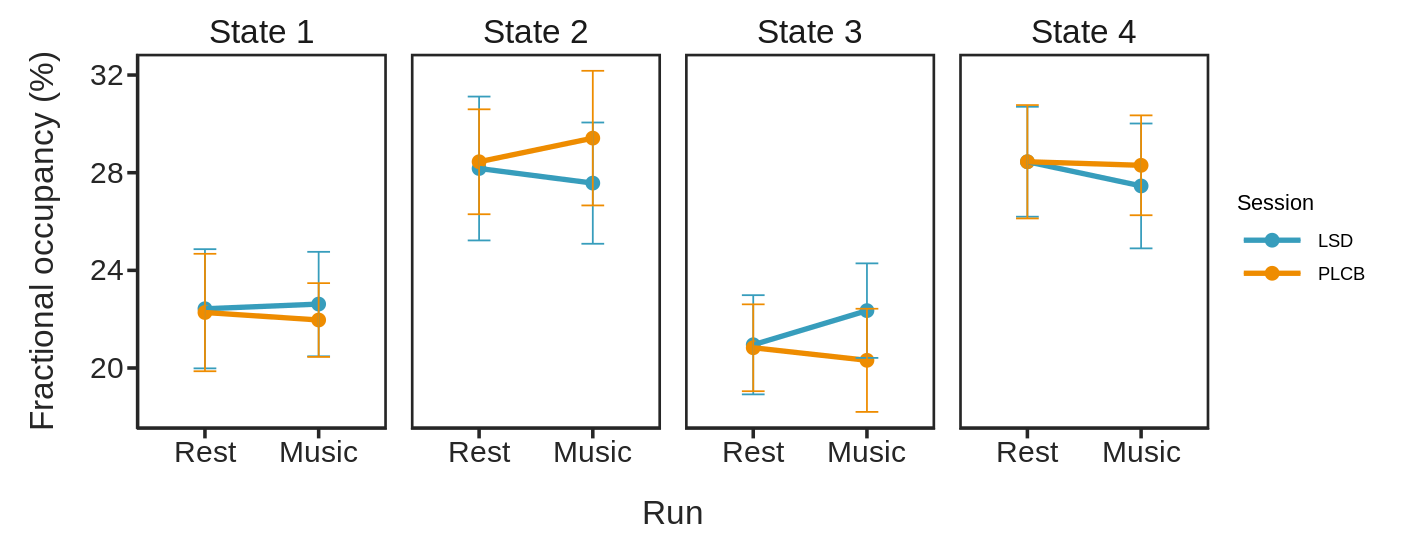

In [25]:
fo_1vs2 <- ggplot(data_run12, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(fo_1vs2)

In [26]:
#Saving the plot
ggsave("Figures/fo_1vs2.jpg", width = 11.7, height = 4.5)

#### Step 5.2: Plotting the results for dwell time ####

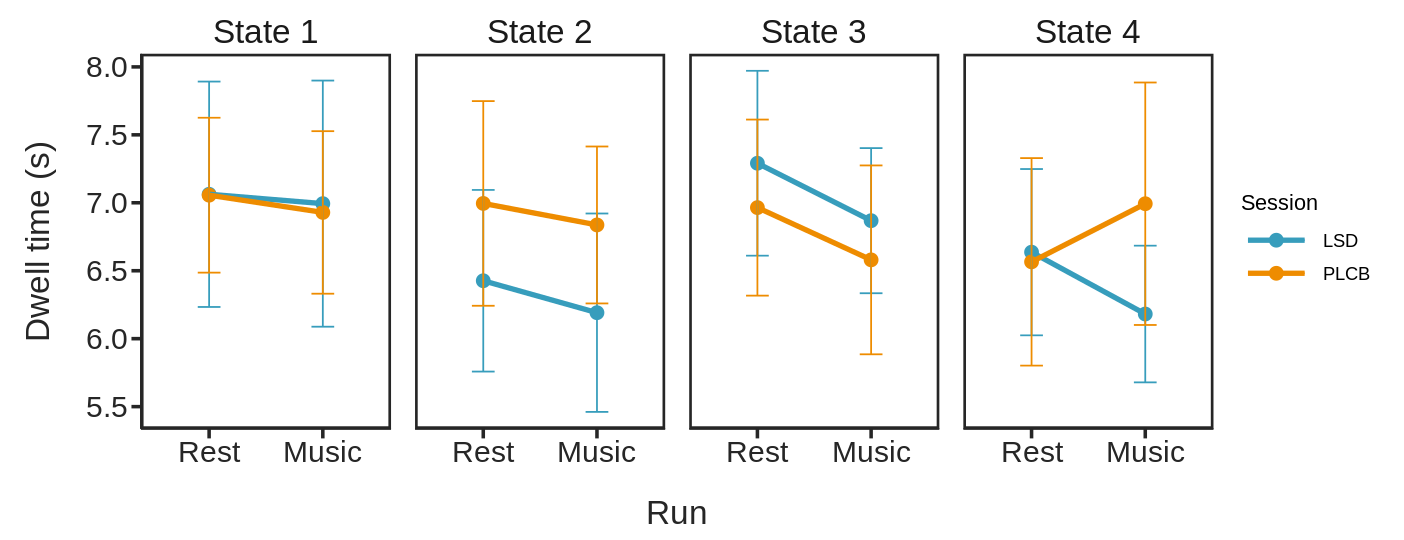

In [48]:
dt_1vs2 <- ggplot(data_run12, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(dt_1vs2)

In [35]:
#Saving the plot
ggsave("Figures/dt_1vs2.jpg", width = 11.7, height = 4.5)

#### **Plotting the results for resting-state before music listening vs. resting-state after music listening** ####

#### Step 5.3: Plotting the results for fractional occupancy ####

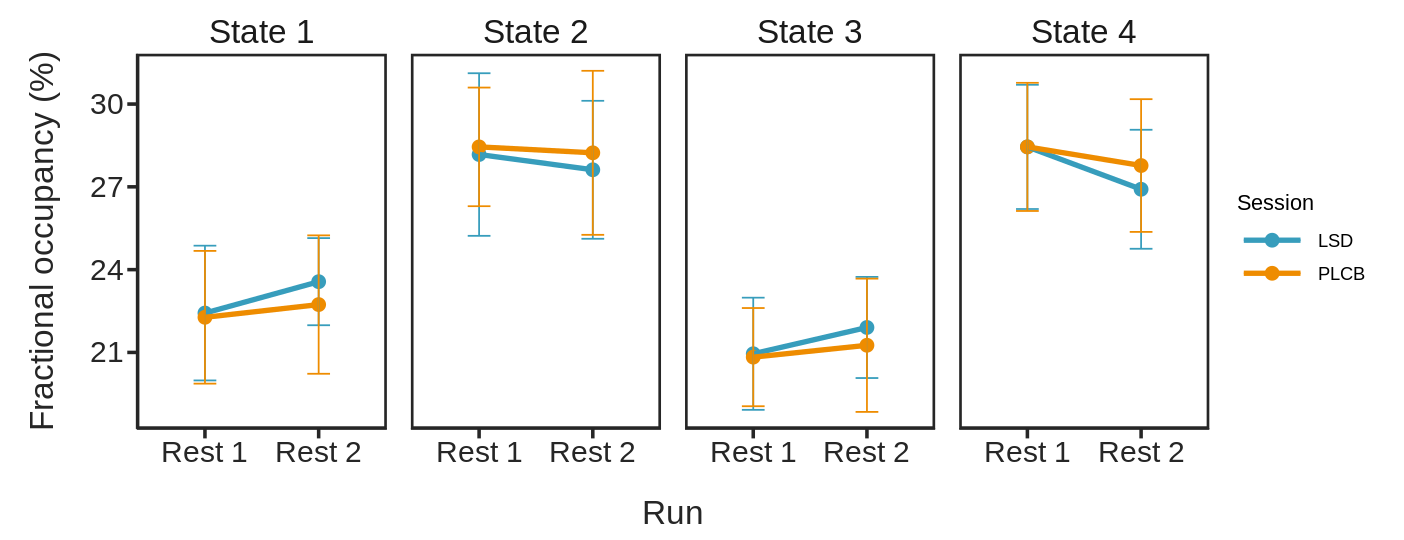

In [36]:
fo_1vs3 <- ggplot(data_run13, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(fo_1vs3)

In [37]:
#Saving the plot
ggsave("Figures/fo_1vs3.jpg", width = 11.7, height = 4.5)

#### Step 5.4: Plotting the results for dwell time ####

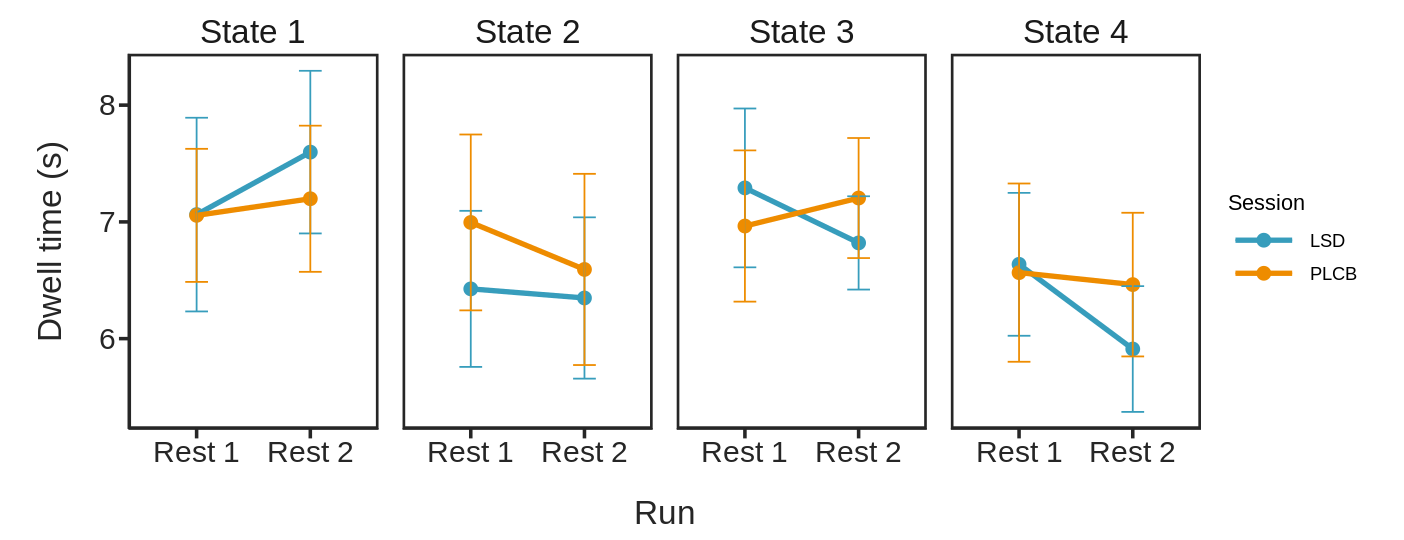

In [44]:
dt_1vs3 <- ggplot(data_run13, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(dt_1vs3)

In [40]:
#Saving the plot
ggsave("Figures/dt_1vs3.jpg", width = 11.7, height = 4.5)